<a href="https://colab.research.google.com/github/ojas-2003/Deep-Learning/blob/main/01_neural_network_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to regresion with neural netwoks in Tensorflow
There  are many definitions for a regression problem but on our case, we are going 
to simplify it : predicting a numerical variable based on some other combinations of 
variables, even shorter... predicting a number.

In [2]:
# Import tensoflow
import tensorflow as tf
print(tf.__version__)

2.8.0


## creating some data to view and fit

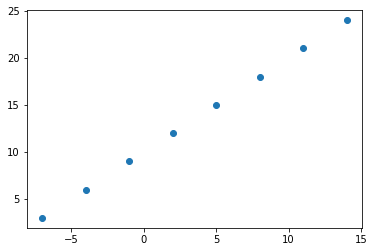

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
x = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y=np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# visualize it 
plt.scatter(x,y);

In [4]:
y==x+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## inputs and output shapes

In [5]:
# create a demo tensor for our housing price prediction problem
house_info = tf.constant(["brdroom", "bathroom", "garage"])
house_price= tf.constant([939700])

In [6]:
# turn our numpy arrays into tensors
x=tf.constant(x)
y=tf.constant(y)

## Steps in modelling with tensorflow

1. **Creating a model** - define the input and the output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model**- define the loss function (in other words, the function which tells our model how wrong it is.) and the optimizer (tells our model how to improve the patterns its learning) and evaluating matrices (what we can use to interpret the performance of model)
3. **Fitting the model**- Letting the model try to find patterns between x and y (Features and labels)

In [7]:
# set the random seed
tf.random.set_seed(42)

# 1. Create a model using the swquential API
model= tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is mean absolue error
              optimizer=tf.keras.optimizers.SGD(), #SGD is short form of stochasitc gradient descent
              metrics=["mae"])

# fit the model
model.fit(tf.expand_dims(x, axis=-1),y, epochs=5)

Epoch 1/5
1/1 [==============================] - 2s 2s/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 10ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 10ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 20ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 17ms/step - loss: 10.9748 - mae: 10.9748


In [8]:
# Check x and y
x,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [9]:
# Try and make a prediction using our model
y_pred=model.predict([17.0])
y_pred

array([[12.716021]], dtype=float32)

# Improve our model
We can improve the model by altering the steps we took to create a model.

1. **Creating a model** - Here we might add more layers, increase the number of hidden units(all called neurons) within each of the hidden layers, change the actiarion function of each layer.
2. **Compiling a model** - Here we might change the optimization function or perhaps the **Learning rate** of the optimization function.
3. **Fitting the model** - Here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from)

In [10]:
#recreate our model with more epochs.

# 1. create a model
model = tf.keras.Sequential([
        tf.keras.layers.Dense(1)
])

# 2. compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model (this time we will train for longer)
model.fit(tf.expand_dims(x, axis=-1),y, epochs=100)


Epoch 1/100
1/1 [==============================] - 1s 948ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 15ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 14ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================] - 0s

In [11]:
# lets see if our model prediction has improved

prediction=model.predict([17.0])
prediction

array([[29.739855]], dtype=float32)

## Lets see if we can make another change to our model.

In [12]:
# 1. create the model with some extra hidden layer.
model=tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. compile the model

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. fit the model
model.fit(tf.expand_dims(x, axis=-1), y, epochs=100)


Epoch 1/100
1/1 [==============================] - 1s 999ms/step - loss: 12.3193 - mae: 12.3193
Epoch 2/100
1/1 [==============================] - 0s 18ms/step - loss: 11.7804 - mae: 11.7804
Epoch 3/100
1/1 [==============================] - 0s 24ms/step - loss: 11.2324 - mae: 11.2324
Epoch 4/100
1/1 [==============================] - 0s 19ms/step - loss: 10.6601 - mae: 10.6601
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 10.0632 - mae: 10.0632
Epoch 6/100
1/1 [==============================] - 0s 13ms/step - loss: 9.4503 - mae: 9.4503
Epoch 7/100
1/1 [==============================] - 0s 13ms/step - loss: 8.7991 - mae: 8.7991
Epoch 8/100
1/1 [==============================] - 0s 19ms/step - loss: 8.1072 - mae: 8.1072
Epoch 9/100
1/1 [==============================] - 0s 30ms/step - loss: 7.3691 - mae: 7.3691
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 6.5758 - mae: 6.5758
Epoch 11/100
1/1 [==============================] - 0s 9ms

In [13]:
model_pred=model.predict([17.])
model_pred

array([[31.223137]], dtype=float32)

### Common ways to improve a deep model:
* Adding layers
* Increse the number of hidden units
* Change the activation function
* Change the optimixation function
* Change the learning rate.
* Fitting on more data.
* Fitting for longer

###### since we can alter each of these they are called hyper parameters.

In [14]:
# 1. create the model with different optimizer.
model=tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. compile the model

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.03),
              metrics=["mae"])

# 3. fit the model
model.fit(tf.expand_dims(x, axis=-1), y, epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 1s 1s/step - loss: 12.7339 - mae: 12.7339
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 10.2842 - mae: 10.2842
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 8.4016 - mae: 8.4016
Epoch 4/100
1/1 [==============================] - 0s 15ms/step - loss: 6.3970 - mae: 6.3970
Epoch 5/100
1/1 [==============================] - 0s 27ms/step - loss: 4.1880 - mae: 4.1880
Epoch 6/100
1/1 [==============================] - 0s 15ms/step - loss: 4.1404 - mae: 4.1404
Epoch 7/100
1/1 [==============================] - 0s 17ms/step - loss: 5.4903 - mae: 5.4903
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 6.1310 - mae: 6.1310
Epoch 9/100
1/1 [==============================] - 0s 19ms/step - loss: 6.1883 - mae: 6.1883
Epoch 10/100
1/1 [==============================] - 0s 19ms/step - loss: 5.6780 - mae: 5.6780
Epoch 11/100
1/1 [==============================] - 0s 16ms/step - loss: 5.0810 

In [15]:
model_pre=model.predict([17.0])
model_pre

array([[28.309595]], dtype=float32)

#### ###### Lerning rate lr is the most important parameter in meural network

# Evqluating a tensorflow model

In practice a typical workflow you'll go through when building neural network is:

``` Build a model -> fit it -> evaluate it -> tweak the model -> fit it -> evaluate it -> tweak the model.......```

When it comes to evaluation of model ... there are 3 words you should memorize:

> "visualize, visualize, visualize"

Its a good idea to visualize:
* The data - What data are we working with? What does it look like ?
* The model itself - what does our model look like?
* The training of a model - How does a model perform while it learns?
* Prediction of model - how do the predictions of the model line up with the ground truth ( The original labels)

In [16]:
# Make a bigger dataset
x = tf.range(-100, 100, 4)
x

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [17]:
# Make labels for the dataset
y=x+10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

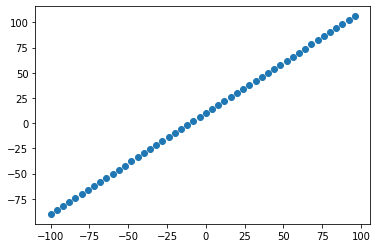

In [18]:
# Visualize the data
import matplotlib.pyplot as plt
plt.scatter(x,y)

## The three sets:

* **Training set** - the model learns from this data, which is typically 70-80% of the total data you have avilable.
* **Validation set** - the model gets trained on this data, which is typically 10-15% of the data available.
* **Test set** - the model gets evaluated on this data to test what it has learned,
this set is typically 10-15% of the total data available.

In [19]:
# Check the length of how many samples we have
len(x) 

50

In [20]:
# Split the data into train and test set
x_train = x[:40] # first 40 are the training samples
y_train = y[:40]


x_test=x[40:] # last 10 are test samples
y_test=y[40:]

len(x_train), len(x_test)

(40, 10)

Visualizing the data!


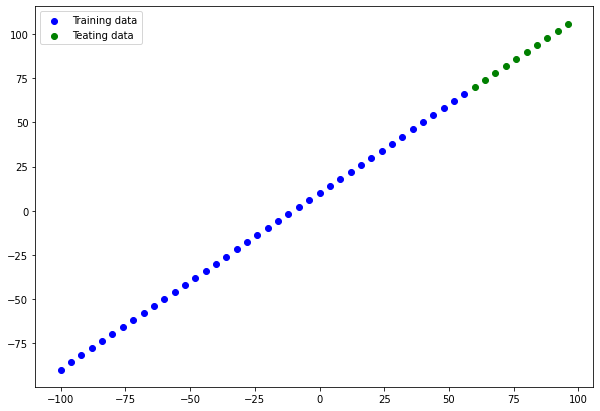

In [21]:
plt.figure(figsize=(10,7))
#plot training data in blue
plt.scatter(x_train, y_train, c='b', label="Training data")
#plot test data in green
plt.scatter(x_test, y_test, c="g", label="Teating data")

#show the legend
plt.legend()

In [22]:
# Lets have a look at how to build a neural network for our data

# Craete a model:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(10, name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="model_1")

# compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit the model
model.fit(tf.expand_dims(x_train, axis=-1), y_train, epochs=50, verbose=0) 

# verbose=0 does not show each epochs.


In [23]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


from tensorflow.python.ops.variables import trainable_variables
* Total params - total number of parameters in the model
* Trainable parameters - these are parameters(patterns) the model can update as it trains.
* Non-Trainable parameters - these parameters aren't updated during training .

**Resource** check MIT video on deep learning for more overview.

## Lets visualize our model's layers

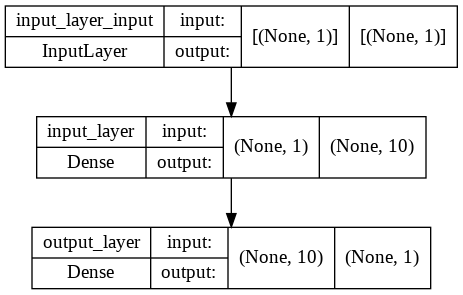

In [24]:

from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

## Visualizing our model's predictions

To visualize predictions, its a good idea to plot them against the ground labels.
often you will see this in the form of y_test or y_true verses y_pred (ground truth verses your models predictions)



In [25]:
# Make some predictions:
y_pred=model.predict(x_test)
y_pred

array([[37.986984],
       [40.46928 ],
       [42.951576],
       [45.433872],
       [47.916172],
       [50.398468],
       [52.880764],
       [55.36306 ],
       [57.84536 ],
       [60.32766 ]], dtype=float32)

In [26]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [27]:
# Lets create a plotting function
def plot_predictions(train_data=x_train,
                     train_labels=y_train,
                     test_data=x_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plots training data, tests data and compares predictions to ground truth labels.

  """
  plt.figure(figsize=(10,7))
  # Plot training data in blue
  plt.scatter(tf.expand_dims(train_data, axis=-1), train_labels, c="b", label="trainng data")

  # Plot testing data in green
  plt.scatter(tf.expand_dims(test_data, axis=-1), test_labels, c="g", label="Testing data")

  # Plot model'spredictions in red
  plt.scatter(tf.expand_dims(test_data, axis=-1), predictions, c="r", label="prediction")
  # Show the legend
  plt.legend();


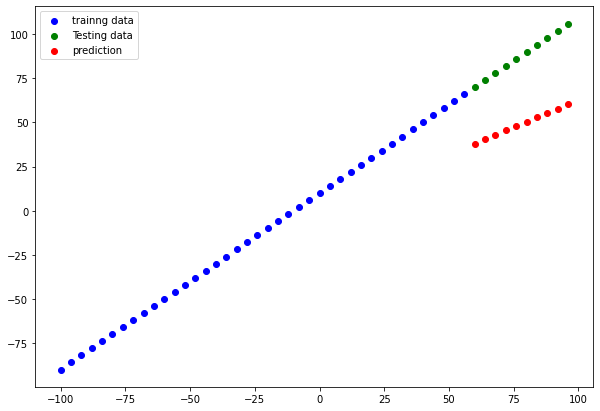

In [28]:
plot_predictions()

## evaluating our models predictions with regression evaluation metrics

Depending on the problem you are working on, there will be diffrent evaluation metricsto evaluate your models performance.

Since we are working on a regression, two of the main metrics:
* MAE - mean absolute error, "On average, how wrong is each of my models prediction".
* MSE - Mean square error, "Square the average errors".






In [29]:
# Evalute the model on the test 
model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 141ms/step - loss: 38.8427 - mae: 38.8427


[38.842681884765625, 38.842681884765625]

### Finding mean absolute error

In [30]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [31]:
y_pred=tf.constant((y_pred)) # convert this error to a tensor.
y_pred

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[37.986984],
       [40.46928 ],
       [42.951576],
       [45.433872],
       [47.916172],
       [50.398468],
       [52.880764],
       [55.36306 ],
       [57.84536 ],
       [60.32766 ]], dtype=float32)>

In [32]:
# we need both y_test and y_pred in same shape:
y_pred=tf.squeeze(y_pred)

In [33]:
mae=tf.metrics.mean_absolute_error(y_true=y_test,
                                   y_pred=y_pred)
mae

<tf.Tensor: shape=(), dtype=float32, numpy=38.84268>

### Finding mean squared error

In [34]:
mse=tf.metrics.mean_squared_error(y_test,
                                  y_pred)
mse

<tf.Tensor: shape=(), dtype=float32, numpy=1527.7571>

In [35]:
# Making some functions to reuse MAE and MSE

def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true, y_pred)

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true, y_pred)
  

## Running experiments to improve our model:

```
Build a model -> fit it -> evaluate it -> 
tweak it -> fit it -> evaluate it ->
tweak it -> fit it .........
```

1. Get more data - get more examples for your model to train on (more opportunities to learn patterns or relationships between features and labels).
2. Make your model larger (using a more complex model) - this is in form of more layers or more hidden units in each layer. 
3. Train for longer - give your model more chance to find patetrns in the data.

**Build ```model_1```**

In [36]:
# Set random seed
tf.random.set_seed(42)

#Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# Fit the model
model_1.fit(tf.expand_dims(x_train, axis=-1), y_train, epochs=100, verbose=0)

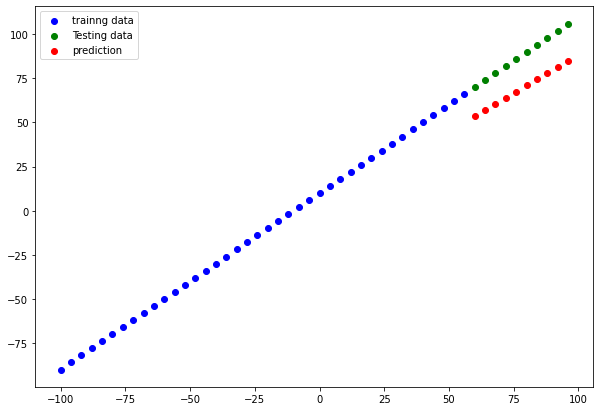

In [37]:
# Make plot predictions for model_1
y_pred_1=model_1.predict(x_test)
plot_predictions(predictions=y_pred_1)

In [38]:
# Create model_1 evaluation matrix
mae_1=mae(y_test, tf.squeeze(tf.constant(y_pred_1)))
              # squeeze removes one dimention
mse_1=mse(y_test, tf.squeeze(tf.constant(y_pred_1)))
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>,
 <tf.Tensor: shape=(), dtype=float32, numpy=353.57336>)

# **Build ```model_2```**
* 2 dense layers, trianed for 100 epochs

In [39]:
tf.random.set_seed(42)
model_2 = tf.keras.Sequential([
      tf.keras.layers.Dense(10),
      tf.keras.layers.Dense(1),
])

model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

model_2.fit(tf.expand_dims(x_train, axis=-1), y_train, epochs=100, verbose=0)


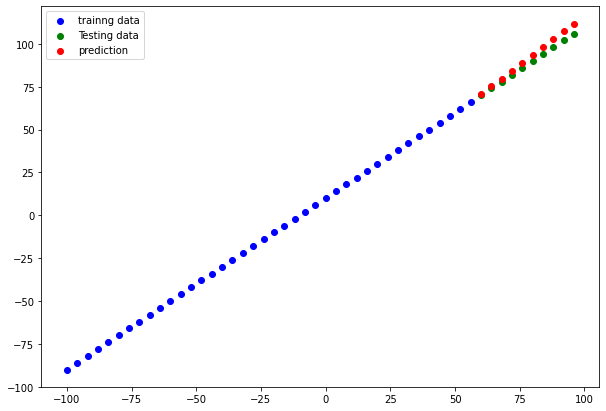

In [40]:
y_pred_2=model_2.predict(x_test)
plot_predictions(predictions=tf.squeeze(y_pred_2))

In [46]:
mse_2=mse(y_test, tf.squeeze(tf.constant(y_pred_2)))
mae_2=mae(y_test, tf.squeeze(tf.constant(y_pred_2)))
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=3.1969407>,
 <tf.Tensor: shape=(), dtype=float32, numpy=13.070143>)

**Build ```model_3```**
* 2 layers, trained for 500 epochs

In [43]:
tf.random.set_seed(42)

model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])
model_3.fit(tf.expand_dims(x_train, axis=-1), y_train, epochs=500, verbose=0)

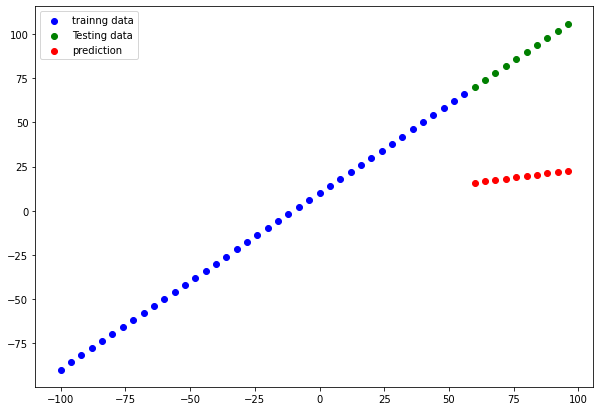

In [42]:
# Visulizing our trained model
y_pred_3=model_3.predict(x_test)
plot_predictions(predictions=y_pred_3)

In [45]:
 # calculate model_3 evaluation
mse_3=mse(y_test, tf.squeeze(tf.constant(y_pred_3)))
mae_3=mae(y_test, tf.squeeze(tf.constant(y_pred_3)))
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.713615>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4808.0273>)

## Compeare the results of our experiments.
we've run a few experiments, lets compare the results.

In [49]:
# Lets compare our model's reslts using a pandas DataFrame
import pandas as pd

model_results =[["model_1", mae_1.numpy(), mse_1.numpy()],
                ["model_2", mae_2.numpy(), mse_2.numpy()],
                ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results=pd.DataFrame(model_results, columns=["model", "mae", "mse"])

all_results

,model,mae,mse
0,model_1,18.745327,353.573364
1,model_2,3.196941,13.070143
2,model_3,68.713615,4808.027344
